<a href="https://colab.research.google.com/github/shubhamawasthi0301/Internship_Project_Banking/blob/master/Internship_Project_Banking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><strong>Internship Project</h1>
<h1><strong>Title:</strong>  <em><u>Marketing Campaign for Banking Products</u></em>
<h3>By: Shubham Awasthi

---




<h2>Importing Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
descr=pd.read_excel('Bank_Personal_Loan_Modelling.xlsx',sheet_name='Description')
descr.drop(columns=descr.columns[0],index=[0,1,2,3])            #description of data

,Unnamed: 1,Unnamed: 2
4,Data Description:,NaN
5,NaN,NaN
6,ID,Customer ID
7,Age,Customer's age in completed years
8,Experience,#years of professional experience
9,Income,Annual income of the customer ($000)
10,ZIPCode,Home Address ZIP code.
11,Family,Family size of the customer
12,CCAvg,Avg. spending on credit cards per month ($000)
13,Education,Education Level. 1: Undergrad; 2: Graduate; 3:...


In [232]:
data = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx',sheet_name='Data')

In [233]:
data  #data contains 5000 rows and 14 columns

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


<h2>Checking for any null values

In [234]:
data.info() #The data does not include any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


<h2> Exploratory Data Analysis

In [235]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


The 'ID' column is not relevant for our machine learning model as its just used to identify each person uniquely and does not add any meaning to the dataset.

In [236]:
data=data.drop(columns='ID') # removing the noisy data

The 'Experience' column contains a negative value of -3 which is faulty data so we will need to remove that or replace it with the median.

In [237]:
correlation = data['Experience'].corr(data['Age'])
correlation

0.9942148569683321

The above snippet shows that Experience and Age are highly correlated so we can safely remove the Experience column because it won't remove any important information from the dataset and we will get rid of the faulty data. Moreover removing the Experience columns will help in avoiding multi-colinearity among the columns

In [238]:
data=data.drop(columns='Experience')  # removing the experience column

In [239]:
for col in list(data.columns):        #calculating the number of unique values
  print(col," : ",data[col].unique().size) #for each column

Age  :  45
Income  :  162
ZIP Code  :  467
Family  :  4
CCAvg  :  108
Education  :  3
Mortgage  :  347
Personal Loan  :  2
Securities Account  :  2
CD Account  :  2
Online  :  2
CreditCard  :  2


In [240]:
(data['Mortgage']==0).sum()   #a lot of people have zero mortgage

3462

In [241]:
(data['CCAvg']==0).sum()      # very few people have average zero average credit card spending per month

106

In [242]:
#categorical columns are ZIP code, Education
#the value counts for the above columns are as follows :
print(data['Education'].value_counts())   #for Education

1    2096
3    1501
2    1403
Name: Education, dtype: int64


Majority of the people are Graduate or Above

In [243]:
print(data['ZIP Code'].value_counts())  #for Zip Code

94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
96145      1
94970      1
94598      1
90068      1
94087      1
Name: ZIP Code, Length: 467, dtype: int64


<h2><strong>Univariate Analysis</strong><h2>

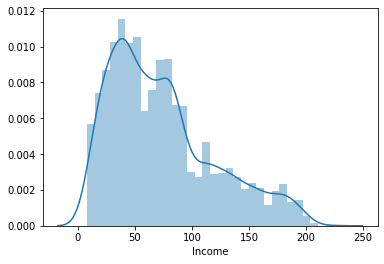

In [244]:
sns.distplot(data['Income'])
plt.show()                          #the income graph is skewed towards the right

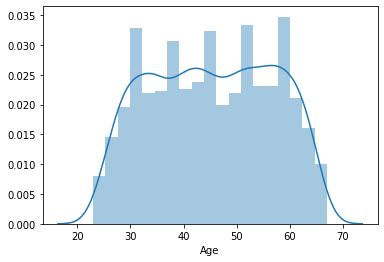

In [245]:
sns.distplot(data['Age'])                     #looks almost normally distibuted
plt.show()

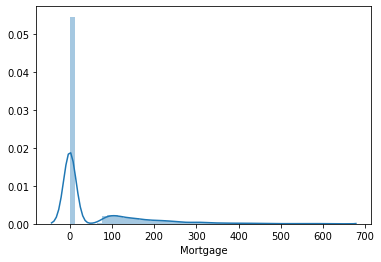

In [246]:
sns.distplot(data['Mortgage'])

From the above graph it is evident that a lot of people of zero house mortgage value and the number of people having non-zero mortgage value is very less 

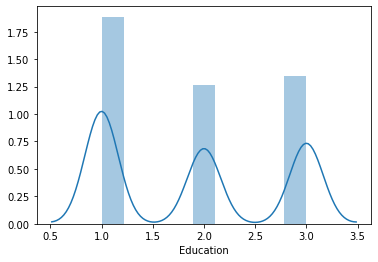

In [247]:
sns.distplot(data['Education'])

0    3530
1    1470
Name: CreditCard, dtype: int64

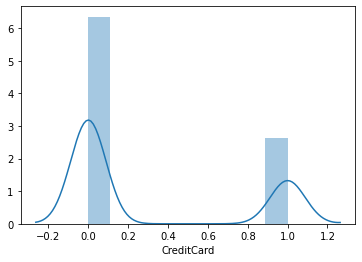

In [248]:
sns.distplot(data['CreditCard'])
data['CreditCard'].value_counts()

Approximately 70% of the people don't have a creditcard

Number of people with non-zero creditcard spending :  4894


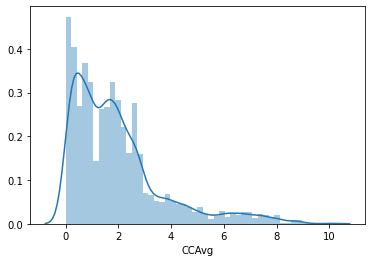

In [249]:
sns.distplot(data['CCAvg'])  #plot of average creditcard spending 
print("Number of people with non-zero creditcard spending : " ,data[(data.CCAvg>0)]['CCAvg'].size) #data is right-skewed

A lot of people use credit cards

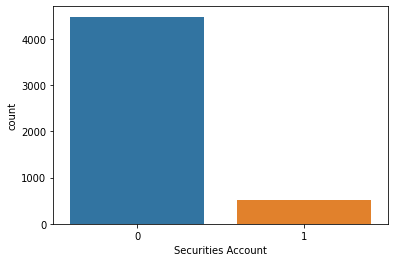

0    4478
1     522
Name: Securities Account, dtype: int64


In [250]:
sns.countplot(data['Securities Account'])
plt.show()
print(data['Securities Account'].value_counts())

A large proportion of the people don't have a securities account

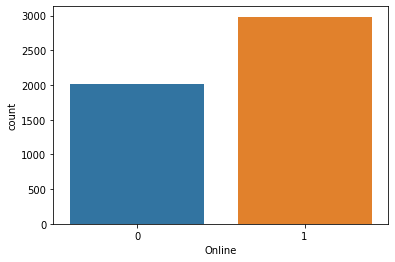

1    2984
0    2016
Name: Online, dtype: int64

In [251]:
sns.countplot(data['Online'])
plt.show()
data['Online'].value_counts()

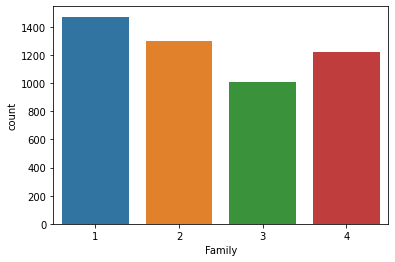

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [252]:
sns.countplot(data['Family'])
plt.show()
data['Family'].value_counts()

<h2><strong>Bivariate Analysis</strong></h2>

In [253]:
def draw(y_var,x_var):      #function to draw sns.boxplot for bivariate analysis
  sns.boxplot(x=data[x_var],y=data[y_var],hue='Personal Loan',data=data)  
  plt.show()

<ol><h3><li>Income Vs Education</li>

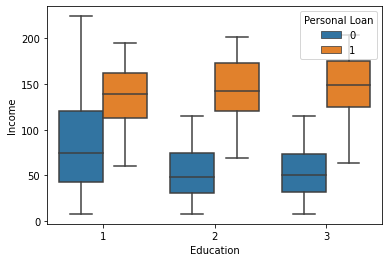

In [254]:
draw('Income','Education')

For the people with the same educational qualification, those with higher income are more likely to get a personal loan

<h3>&ensp;2. Income Vs Age</h3>

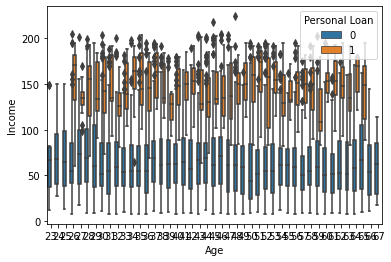

In [255]:
draw('Income','Age')

For same age group those with higher income are more likely to get a personal loan

<h3>&ensp;3. Income Vs Family Size


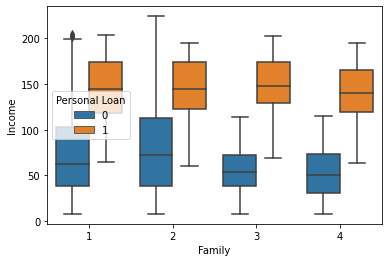

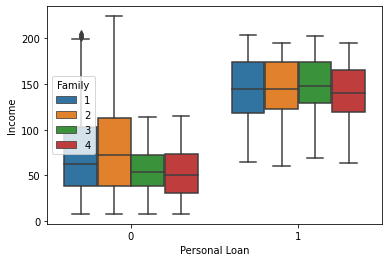

In [256]:
draw('Income','Family')
sns.boxplot(x=data['Personal Loan'],y='Income',hue='Family',data=data)
plt.show()

<h3>&ensp;4. Income Vs Credit Card Spending

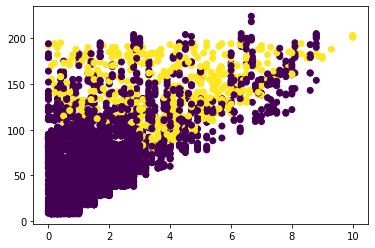

Personal loan - 
 0 : purple 
 1 : yellow


In [257]:
plt.scatter(y=data['Income'],x=data['CCAvg'],c=data['Personal Loan'])
plt.show()
print('Personal loan - \n 0 : purple \n 1 : yellow')

Again we see that families with higher income are more likely to get a loan</br>

<h3>Graph of Probabilty Vs Income</h3>
This graph plots the probability of getting loan if income is less than or equal to the specified income

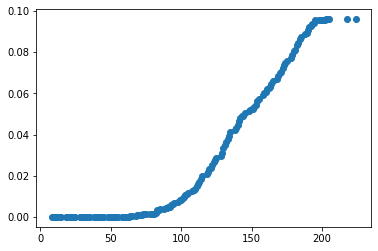

In [258]:
a=list()
for i in data['Income'].unique():
  prob=data[(data['Income']<=i) & (data['Personal Loan']==1)].shape[0]/(data.Income<=i).shape[0]
  a.append((i,prob))
s=pd.DataFrame(a,columns=['Income','Probability'])      
plt.scatter(x=s['Income'],y=s['Probability'])  #Probability of getting loan provided income is less than or equal to the given Income
plt.show()

<strong>Hence we can say that high income will play an important role in deciding whether a customer gets a loan or not, however this is not the only variable</strong>

<h3>&ensp;5. Education and Personal Loan

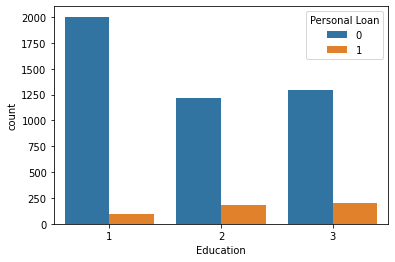

In [259]:
sns.countplot(x=data['Education'],hue='Personal Loan',data=data)
plt.show()

The only thing worth noting is that<strong> out of those who have got the loan, majority are graduate or above</strong>


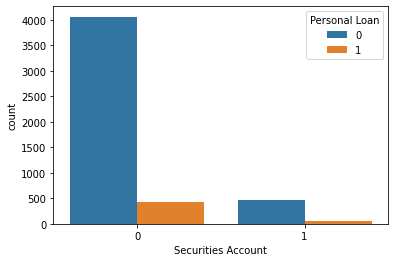

In [260]:
sns.countplot(x=data['Securities Account'],hue='Personal Loan',data=data)
plt.show()

Majortiy of the people who have securities account don't have a personal loan

<h3><em> Correlation Matrix :</em></h3>

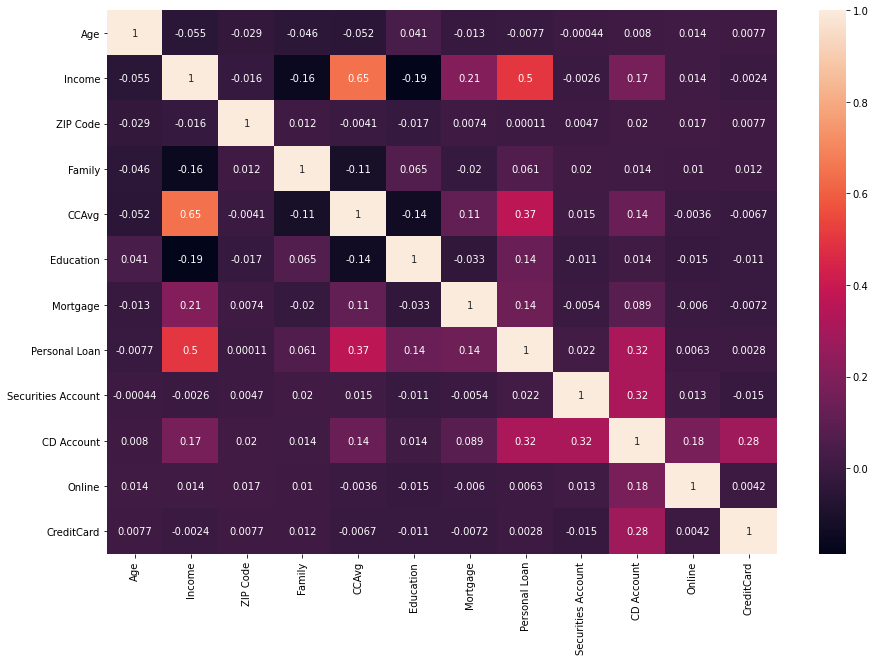

In [261]:
plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)

The maximum value in any cell is 0.65 which not very high, hence the columns are not highly correlated and there is no multi-collinearity

In [262]:
data.nunique()

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

Since the Number of unique values for Zip-code is very large it would not make sense to incorporate the zip-code data. This is because the zip-code is a categorical column with nominal data. Hence to account for all the zip-codes 467 new columns(one for each zip-code) would have to be made, which won't be beneficial for the machine learning model as these columns would be highly correlated. Therefore it makes sense to remove this column from the dataset.

In [263]:
data=data.drop(columns='ZIP Code')    #removing the zip code column
data

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,0,1,0
4996,30,15,4,0.4,1,85,0,0,0,1,0
4997,63,24,2,0.3,3,0,0,0,0,0,0
4998,65,49,3,0.5,2,0,0,0,0,1,0


<h2><strong>Normalizing the Data</strong><h1>

In order to increase the accuracy of our machine learning model we need to normalize the data as well as get rid of the outliers. This can be done by applying power transformation on the necessary columns

In [264]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson',standardize=False)   #applying power transformation on Income column
pt.fit(data['Income'].values.reshape(-1,1))
income=pt.transform(data['Income'].values.reshape(-1,1))

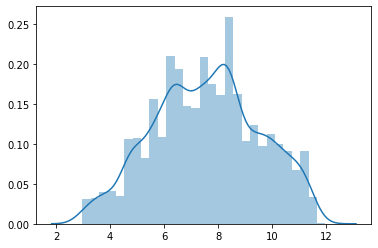

In [265]:
sns.distplot(income)  #new income distribution

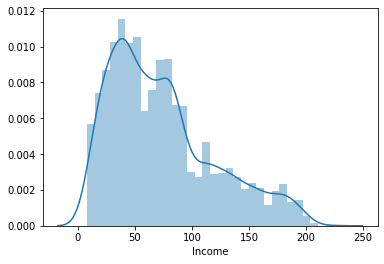

In [266]:
sns.distplot(data["Income"])  #old income distribution

The new graph is less skewed and is normalized

In [267]:
income=pd.DataFrame(income,columns=['Val'])['Val']

In [268]:
data['Income']=income

In [269]:
data['CCAvg']=pd.Series(pt.fit_transform(data['CCAvg'].values.reshape(-1,1)).flatten())

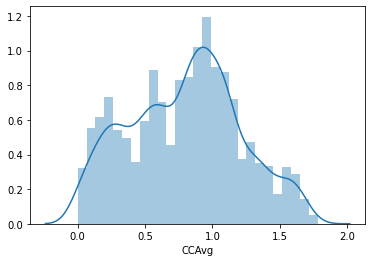

In [270]:
sns.distplot(data['CCAvg'])

The graph is less skewed and approximately normally distributed

In [271]:
#Transforming Mortgage using Label Encoding
data['Mortgage_New']=pd.cut(data['Mortgage'],bins=[0,100,200,300,400,500,600,700],labels=[0,1,2,3,4,5,6],include_lowest=True)
data.drop(['Mortgage'], axis=1, inplace=True)

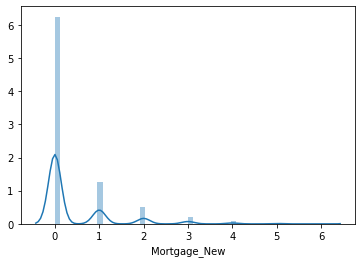

In [272]:
sns.distplot(data['Mortgage_New'])

<h2>Separating Target and Feature Variables

In [273]:
X = data.drop(columns='Personal Loan')
Y= data[['Personal Loan']]
X

,Age,Income,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_New
0,25,6.827583,4,0.845150,1,1,0,0,0,0
1,45,5.876952,3,0.814468,1,1,0,0,0,0
2,39,3.504287,1,0.633771,1,0,0,0,0,0
3,35,8.983393,1,1.107409,2,0,0,0,0,0
4,35,6.597314,4,0.633771,2,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
4995,29,6.287699,1,0.928929,3,0,0,1,0,0
4996,30,4.077942,4,0.322048,1,0,0,1,0,0
4997,63,5.058173,2,0.253538,3,0,0,0,0,0
4998,65,6.827583,3,0.384643,2,0,0,1,0,0


In [274]:
Y

,Personal Loan
0,0
1,0
2,0
3,0
4,0
...,...
4995,0
4996,0
4997,0
4998,0


<h2><Strong>Splitting the dataset using stratified sampling

We are using stratified sampling because the dataset is biased. There are only about 10% of the people in the whole dataset who have Personal Loan. Hence , to ensure same proportion of these people in both the training and test sets we are using stratified sampling

In [275]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.3,stratify=Y,random_state=0,)

<h2>Standardizing the training as well as test data separately

We are standardizing the test and training data separately because we want the test data to remain isolated from the machine learning model. If we would have standardized data before splitting some of the information of test data would get reflected on the training data , which is not desirable 

In [276]:
train_X

,Age,Income,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_New
3789,51,5.058173,3,0.322048,1,0,0,1,1,0
758,64,5.948841,1,0.814468,2,1,0,0,0,0
2868,52,5.651776,4,0.902268,1,0,0,1,1,0
2550,32,4.661500,1,0.384643,3,0,0,1,0,1
2150,62,7.097040,1,0.544705,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
3597,56,6.937650,3,0.954454,3,0,0,1,0,0
4670,52,11.394571,1,0.874376,1,0,0,1,0,0
988,63,5.728502,1,0.928929,2,0,0,0,0,0
2037,35,6.991517,2,0.633771,2,0,0,0,1,0


In [277]:
from sklearn.preprocessing import StandardScaler
from sklearn_pandas import DataFrameMapper

mapper = DataFrameMapper([(train_X.columns, StandardScaler())])
scaled_features = mapper.fit_transform(train_X.copy())
train_X = pd.DataFrame(scaled_features, index=train_X.index, columns=train_X.columns)

In [278]:
mapper = DataFrameMapper([(test_X.columns, StandardScaler())])
scaled_features = mapper.fit_transform(test_X.copy())
test_X = pd.DataFrame(scaled_features, index=test_X.index, columns=test_X.columns)

In [279]:
np_train_X=train_X.values   #converting data to numpy array
np_train_Y=train_Y.values
np_test_X=test_X.values
np_test_Y=test_Y.values

<h2><strong><em>Model Building</em></strong></h2>


---





<h2><strong>Logistic Regression Model</strong></h2>

In [280]:
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression()
lreg.fit(np_train_X,np_train_Y) #fitting the training data to build the model

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [281]:
Y_pred_train= lreg.predict(np_train_X)  #predicting training data
Y_pred_test=lreg.predict(np_test_X)     #predicting test data

In [282]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,recall_score,roc_auc_score
print("Training Accuracy :",accuracy_score(np_train_Y,Y_pred_train))
print("Test Accuracy :",accuracy_score(np_test_Y,Y_pred_test))

Training Accuracy : 0.9568571428571429
Test Accuracy : 0.9546666666666667


Confusion Matrix


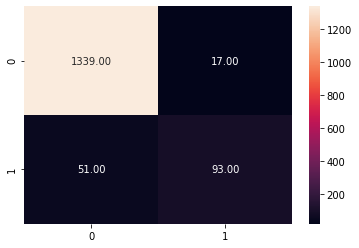

In [283]:
cm = confusion_matrix(np_test_Y,Y_pred_test)  #confusion matrix
sns.heatmap(cm,annot=True,fmt='.2f')
print("Confusion Matrix")
plt.show()

In [284]:
def show_scores(model,pred,actual):  #method to print various classification metric scores
  print("Results of ",model," model")
  print("Recall_Score :",recall_score(actual,pred))   #different Evaluation Metrics
  print("F1_Score : ",f1_score(actual,pred))
  print("Precision_Score : ",precision_score(actual,pred))
  print("ROC_AUC_Score : ",roc_auc_score(actual,pred))

In [285]:
show_scores("Logistic Regression",Y_pred_test,np_test_Y)

Results of  Logistic Regression  model
Recall_Score : 0.6458333333333334
F1_Score :  0.7322834645669292
Precision_Score :  0.8454545454545455
ROC_AUC_Score :  0.8166482300884956


<h2><strong>Decision Tree Algorithm</strong><h2>

I tried using max_depth=8 as well as max_depth=9. I got almost same accuracy results for both the training and test data</br> (test = 98%+ ,train =99%+) but for max_depth=8, the recall_score was greater by about 1% hence I have used max_depth=8 while building the model. Higher recall means less false negatives which is more favourable

In [286]:
from sklearn.tree import DecisionTreeClassifier           #building the model
dt = DecisionTreeClassifier(random_state=0,max_depth=8)
dt.fit(np_train_X,np_train_Y)
dt_pred_train = dt.predict(np_train_X)            #predicting on training values
dt_pred_test  =dt.predict(np_test_X)              #predicting on test values
print("Train Accuracy : ",accuracy_score(np_train_Y,dt_pred_train))
print("Test Accuracy : ",accuracy_score(np_test_Y,dt_pred_test))

Train Accuracy :  0.9957142857142857
Test Accuracy :  0.9826666666666667


Confusion Matrix


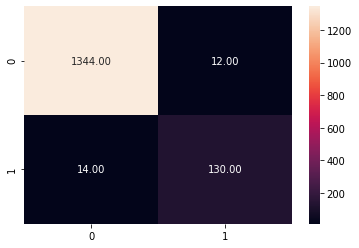

In [287]:
cm = confusion_matrix(np_test_Y,dt_pred_test)  #confusion matrix
sns.heatmap(cm,annot=True,fmt='.2f')
print("Confusion Matrix")
plt.show()

In [288]:
show_scores("Decision Tree",dt_pred_test,np_test_Y)

Results of  Decision Tree  model
Recall_Score : 0.9027777777777778
F1_Score :  0.9090909090909091
Precision_Score :  0.9154929577464789
ROC_AUC_Score :  0.9469641101278269


Displaying the Decision Tree

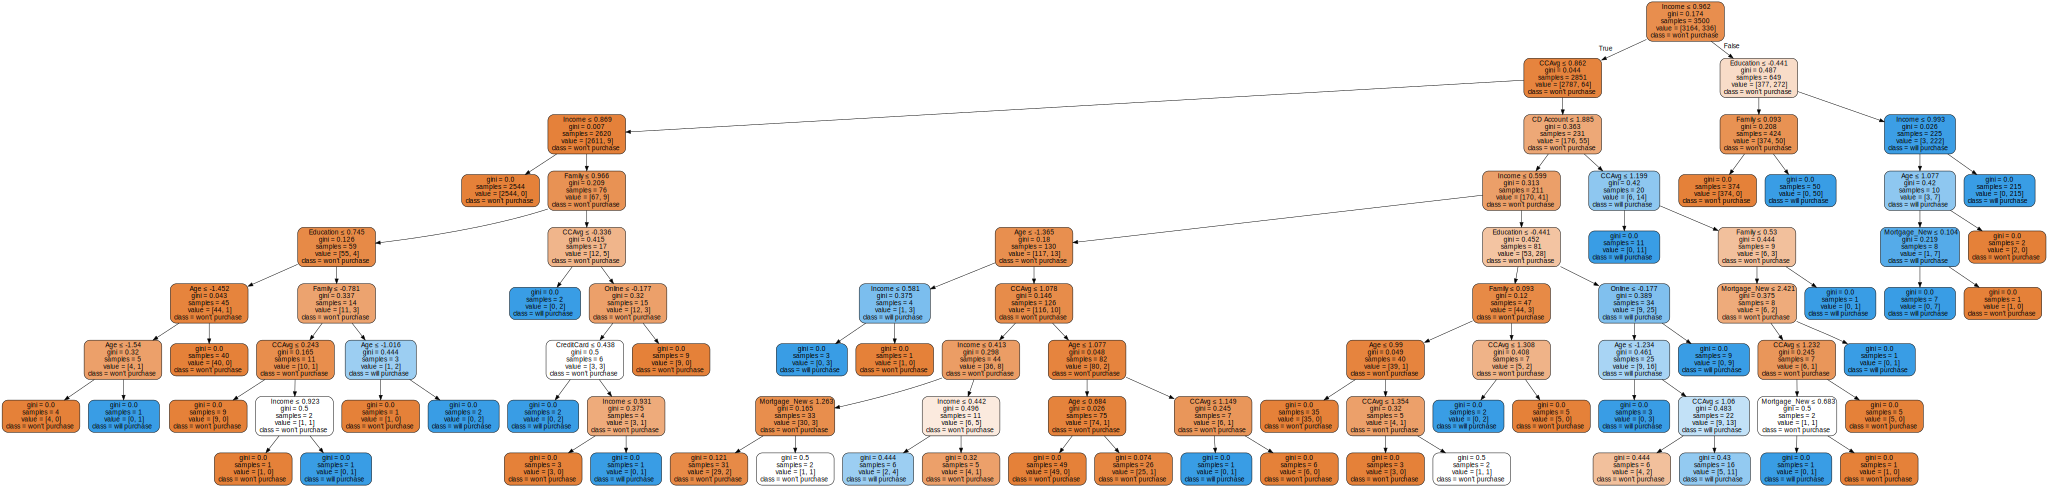

In [289]:
from sklearn import tree
import pydotplus
dot_data = tree.export_graphviz(dt, out_file=None,feature_names=train_X.columns,class_names=["won't purchase",'will purchase'],filled=True, rounded=True,  special_characters=True)  
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.set_size('"30,30!"')
import graphviz
gvz_graph = graphviz.Source(pydot_graph.to_string())
gvz_graph

<h2><strong>Random Forest Algorithm</strong></h2>

I tried taking the n_estimators to be 500 and the max_depth as 8 but that set of parameters had almost same accuracy with less recall score.

In [290]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000,max_depth=9,random_state=0)
rf.fit(np_train_X,np_train_Y)
rf_train_pred=rf.predict(np_train_X)
rf_test_pred= rf.predict(np_test_X)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [291]:
print("Training Accuracy : ",accuracy_score(np_train_Y,rf_train_pred))
print("Test Accuracy : ",accuracy_score(np_test_Y,rf_test_pred))

Training Accuracy :  0.9968571428571429
Test Accuracy :  0.9873333333333333


In [292]:
show_scores("Random_forest",rf_test_pred,np_test_Y)

Results of  Random_forest  model
Recall_Score : 0.8888888888888888
F1_Score :  0.9309090909090909
Precision_Score :  0.9770992366412213
ROC_AUC_Score :  0.943338249754179


Confusion Matrix


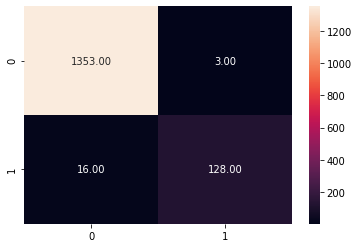

In [293]:
cm = confusion_matrix(np_test_Y,rf_test_pred)  #confusion matrix
sns.heatmap(cm,annot=True,fmt='.2f')
print("Confusion Matrix")
plt.show()

<h2><strong>SVM model<strong><h2>

The kernel functions that I tried were 'linear' , 'poly' with degree = 3,4,5,6,7 and 'rbf'. 'rbf' has given the best results

In [294]:
from sklearn import svm
svc = svm.SVC(kernel='rbf')
svc.fit(np_train_X,np_train_Y)
svc_pred_test = svc.predict(np_test_X)
svc_pred_train = svc.predict(np_train_X)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [295]:
print("Training Accuracy : ",accuracy_score(np_train_Y,svc_pred_train))
print("Test Accuracy : ",accuracy_score(np_test_Y,svc_pred_test))

Training Accuracy :  0.9797142857142858
Test Accuracy :  0.976


In [296]:
show_scores("SVM Classifier",svc_pred_test,np_test_Y)

Results of  SVM Classifier  model
Recall_Score : 0.7847222222222222
F1_Score :  0.8625954198473282
Precision_Score :  0.9576271186440678
ROC_AUC_Score :  0.890517453294002


Confusion Matrix


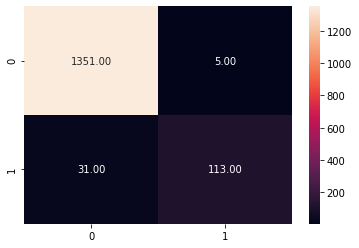

In [297]:
cm = confusion_matrix(np_test_Y,svc_pred_test)  #confusion matrix
sns.heatmap(cm,annot=True,fmt='.2f')
print("Confusion Matrix")
plt.show()

<h2><strong>KNN model<strong><h2>

In [298]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

<h3>Hyperparameter tuning using GridSearchCV</h3>


For n_neighbours=1,leafsize=1 the test accuracy came out to be 1.00. Hence to avoid overfitting I have ommitted 1 from the n_neighbors range

In [299]:
#defining some hyperparameters
leaf_size = list(range(1,25))
n_neighbors = list(range(2,10))
hyperparameters = dict(leaf_size=leaf_size,n_neighbors=n_neighbors)
knn = KNeighborsClassifier()
models = GridSearchCV(knn,param_grid=hyperparameters,scoring='recall',cv=5,n_jobs=-1 ) #Scoring metric used is Recall

In order to tune the parameters to get maximum recall_score, the metric used in the GridSearchCV function is recall

In [300]:
models.fit(np_train_X,np_train_Y) #fitting the training data over the grid
knn_best = KNeighborsClassifier(**(models.best_params_)) #using the best parameters to construct KNN Classifier

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [301]:
models.best_params_ #

{'leaf_size': 1, 'n_neighbors': 3}

In [302]:
knn_best.fit(np_train_X,np_train_Y)
knn_pred_train=knn_best.predict(np_train_X)
knn_pred_test=knn_best.predict(np_test_X)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


In [303]:
print("Training Accuracy : ",accuracy_score(np_train_Y,knn_pred_train))
print("Test Accuracy : ",accuracy_score(np_test_Y,knn_pred_test))

Training Accuracy :  0.9777142857142858
Test Accuracy :  0.9626666666666667


In [304]:
show_scores("KNN Model",knn_pred_test,np_test_Y)

Results of  KNN Model  model
Recall_Score : 0.6527777777777778
F1_Score :  0.7704918032786886
Precision_Score :  0.94
ROC_AUC_Score :  0.8241764995083579


Confusion Matrix


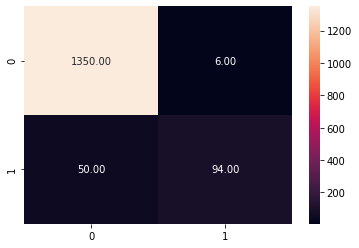

In [305]:
cm = confusion_matrix(np_test_Y,knn_pred_test)  #confusion matrix
sns.heatmap(cm,annot=True,fmt='.2f')
print("Confusion Matrix")
plt.show()

<h2><strong>Naive Bayes Model</strong></h2>

In [306]:
from sklearn.naive_bayes import GaussianNB #using gaussian naive bayes
nb = GaussianNB()
nb.fit(np_train_X,np_train_Y)
nb_pred_train=nb.predict(np_train_X)
nb_pred_test=nb.predict(np_test_X)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [307]:
print("Training Accuracy : ",accuracy_score(np_train_Y,nb_pred_train))
print("Test Accuracy : ",accuracy_score(np_test_Y,nb_pred_test))

Training Accuracy :  0.9085714285714286
Test Accuracy :  0.918


In [308]:
show_scores("Naive Bayes",nb_pred_test,np_test_Y)

Results of  Naive Bayes  model
Recall_Score : 0.5347222222222222
F1_Score :  0.555956678700361
Precision_Score :  0.5789473684210527
ROC_AUC_Score :  0.7467121435594888


Confusion Matrix


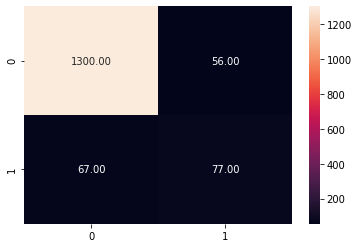

In [309]:
cm = confusion_matrix(np_test_Y,nb_pred_test)  #confusion matrix
sns.heatmap(cm,annot=True,fmt='.2f')
print("Confusion Matrix")
plt.show()

<h2><strong>Neural Network Model</strong></h2>

In [310]:
from keras.models import Sequential
from keras.layers import Dense

This neural network has 3 layers with 10,7,1 neurons respectively from input to output

In [311]:
neural_net = Sequential()
neural_net.add(Dense(7,input_dim=10,activation='relu'))
neural_net.add(Dense(1,activation='sigmoid'))

In [312]:
neural_net.compile(loss='binary_crossentropy', optimizer='adam', metrics=['Recall','accuracy','Precision','AUC'])

In [313]:
# fit the keras model on the dataset
neural_net.fit(np_train_X, np_train_Y, epochs=500, batch_size=32,verbose=0)

In [321]:
eval_train=neural_net.evaluate(np_train_X,np_train_Y,verbose=0)
print(eval_train)

[0.045037101954221725, 0.9017857313156128, 0.9837142825126648, 0.9266055226325989, 0.9904097318649292]


In [322]:
eval_test=neural_net.evaluate(np_test_X,np_test_Y,verbose=0)
print(eval_test)

[0.05809920281171799, 0.8680555820465088, 0.9786666631698608, 0.9057971239089966, 0.9809207320213318]


In [316]:
neural_net_pred_test=(neural_net.predict(np_test_X)>0.5)*1

In [324]:
show_scores("Neural_network",neural_net_pred_test,np_test_Y)

Results of  Neural_network  model
Recall_Score : 0.8680555555555556
F1_Score :  0.8865248226950354
Precision_Score :  0.9057971014492754
ROC_AUC_Score :  0.9292342674532941


Confusion Matrix


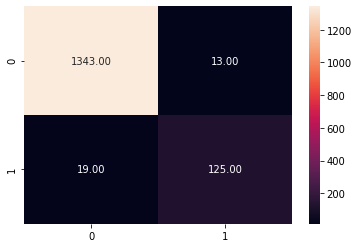

In [317]:
cm = confusion_matrix(np_test_Y,neural_net_pred_test)  #confusion matrix
sns.heatmap(cm,annot=True,fmt='.2f')
print("Confusion Matrix")
plt.show()

<h2><strong>Comparing the performance of various models and deciding the metric for the same</strong></h2></br>


The most important metric for comparing the various models that have been built on the given dataset is the **'Recall'** metric. This is because the we want to minimize the number of potential customers who might take the personal loan but the machine learning model labels them otherwise. Such cases are referred to as 'False Negatives'. Recall metric tells us the fraction of the people a class that are classified correctly. Hence a **higher the 'Recall' score lesser are the 'False Negatives'**.At the same time the accuracy should be greater than 91% (which is obtained by labelling every personal as unlikely of taking the loan).

In [318]:
acc_scores=[accuracy_score(np_test_Y,Y_pred_test),accuracy_score(np_test_Y,dt_pred_test),accuracy_score(np_test_Y,rf_test_pred),accuracy_score(np_test_Y,svc_pred_test),accuracy_score(np_test_Y,knn_pred_test),accuracy_score(np_test_Y,nb_pred_test),eval_test[2]]
recall_scores=[recall_score(np_test_Y,Y_pred_test),recall_score(np_test_Y,dt_pred_test),recall_score(np_test_Y,rf_test_pred),recall_score(np_test_Y,svc_pred_test),recall_score(np_test_Y,knn_pred_test),recall_score(np_test_Y,nb_pred_test),eval_test[1]]

In [319]:
d = dict(Accuracy=acc_scores,Recall=recall_scores)
df = pd.DataFrame(d,index=['Logistic Regression','Decision Tree','Random Forest','SVM','KNN','Naive Bayes','Neural Network'])

In [320]:
df.sort_values(by=['Recall','Accuracy'],ascending=False)

,Accuracy,Recall
Decision Tree,0.982667,0.902778
Random Forest,0.987333,0.888889
Neural Network,0.978667,0.868056
SVM,0.976000,0.784722
KNN,0.962667,0.652778
Logistic Regression,0.954667,0.645833
Naive Bayes,0.918000,0.534722


It is evident from the above table that the Decision Tree algorithm has performed the best followed by Random Forest and Neural Network</br>All models have accuracy above 91% hence all models did better than the accuracy of majority class classifier

The Number of False Negatives  in the test case are :
<li>14 for Decision Tree model</li>
<li>16 for Random Forest model</li>
<li>19 for Neural Network</li>
<li>31 for SVM model</li>
<li>50 for KNN model</li>
<li>51 for Logistic Regression Model</li>
<li>67 for Naive Bayes Model</li>



---



<h2><strong>Business Understanding of the Model</strong></h2>

The purpose of all these machine learning models is to help the bank in identifying potential customers who will be highly likely of taking a personal loan. The goal is to predict in such a way that the number of potential customers who would take the loan but are missed out by the model is minimum. This will help in increasing the revenue of the bank because the bank won't lose any valuable customers.In order to do so the goal is to minimize the false negatives which in turn can be done by taking the algorithm with maximum recall score.The dataset provided contained approximately 91% people who did not have any personal loan. Hence accuracy of the majority class classifier will be 91%.In order  for our model to be of any consequence its accuracy should be greater than 91%.</br>
In the exploratory data analysis we found some important relations among the feature variables. The most important of which is that the income of a person plays a major factor in deciding the likelihood of a person taking a loan, this is in tune with our understanding of the normal world.  